In [1]:
import pandas as pd
import seaborn as sns
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols 
from scipy import signal
from datetime import datetime, timedelta

import numpy as np

from bokeh.models import ColumnDataSource, RangeTool, BoxAnnotation, Label, Column, YearsTicker
from bokeh.plotting import figure
from bokeh.io import output_notebook, show, curdoc

In [121]:
effr = pd.read_csv('effr.csv')
print(len(effr))
effr.head()

830


,DATE,EFFR
0,1954-07-01,0.80
1,1954-08-01,1.22
2,1954-09-01,1.07
3,1954-10-01,0.85
4,1954-11-01,0.83


In [3]:
unrate = pd.read_csv('unrate.csv')
print(len(unrate))
unrate.head()

908


,DATE,UNEMPLOYMENT
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


In [122]:
pce = pd.read_csv('pce.csv')
print(len(pce))
pce.head()

257


,DATE,PCE
0,1959-04-01,2.1
1,1959-07-01,2.7
2,1959-10-01,2.3
3,1960-01-01,1.3
4,1960-04-01,1.5


In [123]:
merged = effr.merge(unrate, on='DATE')
merged = merged.merge(pce, on='DATE')

unrate_col = merged.pop('UNEMPLOYMENT')
effr_col = merged.pop('EFFR')

merged['UNEMPLOYMENT'] = unrate_col
merged['EFFR'] = effr_col

print(len(merged))
merged.head()

257


,DATE,PCE,UNEMPLOYMENT,EFFR
0,1959-04-01,2.1,5.2,2.96
1,1959-07-01,2.7,5.1,3.47
2,1959-10-01,2.3,5.7,3.98
3,1960-01-01,1.3,5.2,3.99
4,1960-04-01,1.5,5.2,3.92


In [125]:
merged = merged[merged['DATE'] >= '2000-01-01']
merged.head()

,DATE,PCE,UNEMPLOYMENT,EFFR
163,2000-01-01,2.1,4.0,5.45
164,2000-04-01,1.4,3.8,6.02
165,2000-07-01,1.9,4.0,6.54
166,2000-10-01,2.0,3.9,6.51
167,2001-01-01,2.6,4.2,5.98


In [126]:
# merged['EFFR_LAG_12M'] = merged['EFFR'].shift(4)

# merged['UNEMPLOYMENT_LAG_1Y'] = merged['UNEMPLOYMENT'].shift(4)
# merged['UNEMPLOYMENT_LAG_2Y'] = merged['UNEMPLOYMENT'].shift(8)
# merged['UNEMPLOYMENT_LAG_5Y'] = merged['UNEMPLOYMENT'].shift(20)

# merged['PCE_LAG_1Y'] = merged['PCE'].shift(4)
# merged['PCE_LAG_2Y'] = merged['PCE'].shift(8)
# merged['PCE_LAG_2Y'] = merged['PCE'].shift(20)

# merged.head()

In [127]:
merged['UNEMPLOYMENT_SMA_1Y'] = merged['UNEMPLOYMENT'].rolling(4).mean()
merged['UNEMPLOYMENT_SMA_2Y'] = merged['UNEMPLOYMENT'].rolling(8).mean()
merged['UNEMPLOYMENT_SMA_3Y'] = merged['UNEMPLOYMENT'].rolling(12).mean()
merged['UNEMPLOYMENT_SMA_4Y'] = merged['UNEMPLOYMENT'].rolling(16).mean()
merged['UNEMPLOYMENT_SMA_5Y'] = merged['UNEMPLOYMENT'].rolling(20).mean()


merged['PCE_SMA_1Y'] = merged['PCE'].rolling(4).mean()
merged['PCE_SMA_2Y'] = merged['PCE'].rolling(8).mean()
merged['PCE_SMA_3Y'] = merged['PCE'].rolling(12).mean()
merged['PCE_SMA_4Y'] = merged['PCE'].rolling(16).mean()
merged['PCE_SMA_5Y'] = merged['PCE'].rolling(20).mean()


merged.tail()

,DATE,PCE,UNEMPLOYMENT,EFFR,UNEMPLOYMENT_SMA_1Y,UNEMPLOYMENT_SMA_2Y,UNEMPLOYMENT_SMA_3Y,UNEMPLOYMENT_SMA_4Y,UNEMPLOYMENT_SMA_5Y,PCE_SMA_1Y,PCE_SMA_2Y,PCE_SMA_3Y,PCE_SMA_4Y,PCE_SMA_5Y
252,2022-04-01,4.7,3.6,0.33,4.375,5.8750,6.041667,5.48125,5.210,4.975,4.2250,3.125000,2.77500,2.625
253,2022-07-01,4.7,3.5,1.68,3.900,5.0375,6.025000,5.46250,5.170,4.950,4.4125,3.383333,2.98125,2.795
254,2022-10-01,4.4,3.7,3.08,3.700,4.6375,6.033333,5.45625,5.145,4.850,4.7750,3.650000,3.13750,2.915
255,2023-01-01,4.9,3.4,4.33,3.550,4.2750,6.025000,5.41875,5.115,4.675,4.9875,3.900000,3.35000,3.030
256,2023-04-01,3.7,3.4,4.83,3.500,3.9375,5.083333,5.40625,5.085,4.425,4.7000,4.291667,3.45000,3.105


                            OLS Regression Results                            
Dep. Variable:                    PCE   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.340
Date:                Tue, 19 Sep 2023   Prob (F-statistic):              0.250
Time:                        11:55:12   Log-Likelihood:                -144.68
No. Observations:                  94   AIC:                             293.4
Df Residuals:                      92   BIC:                             298.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9189      0.158     12.126      0.0

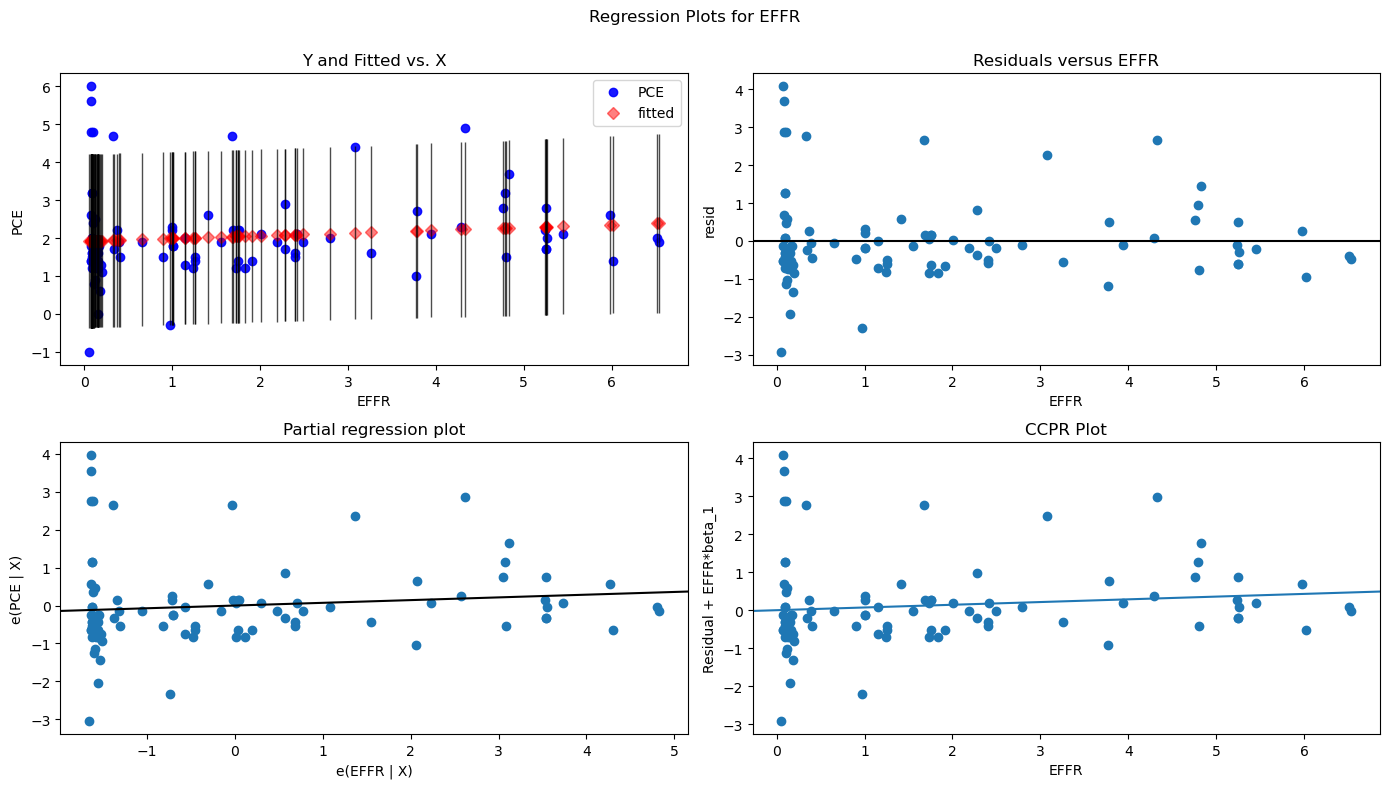

In [130]:
# fit simple linear regression model
mod = ols('PCE ~ EFFR',
                   data=merged).fit()
  
# display model summary
print(mod.summary())
  
# modify figure size
fig = plt.figure(figsize=(14, 8))
  
# creating regression plots
fig = sm.graphics.plot_regress_exog(mod,
                                    'EFFR',
                                    fig=fig)

                            OLS Regression Results                            
Dep. Variable:           UNEMPLOYMENT   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     40.98
Date:                Tue, 19 Sep 2023   Prob (F-statistic):           6.37e-09
Time:                        11:55:42   Log-Likelihood:                -183.72
No. Observations:                  94   AIC:                             371.4
Df Residuals:                      92   BIC:                             376.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.8751      0.240     28.678      0.0

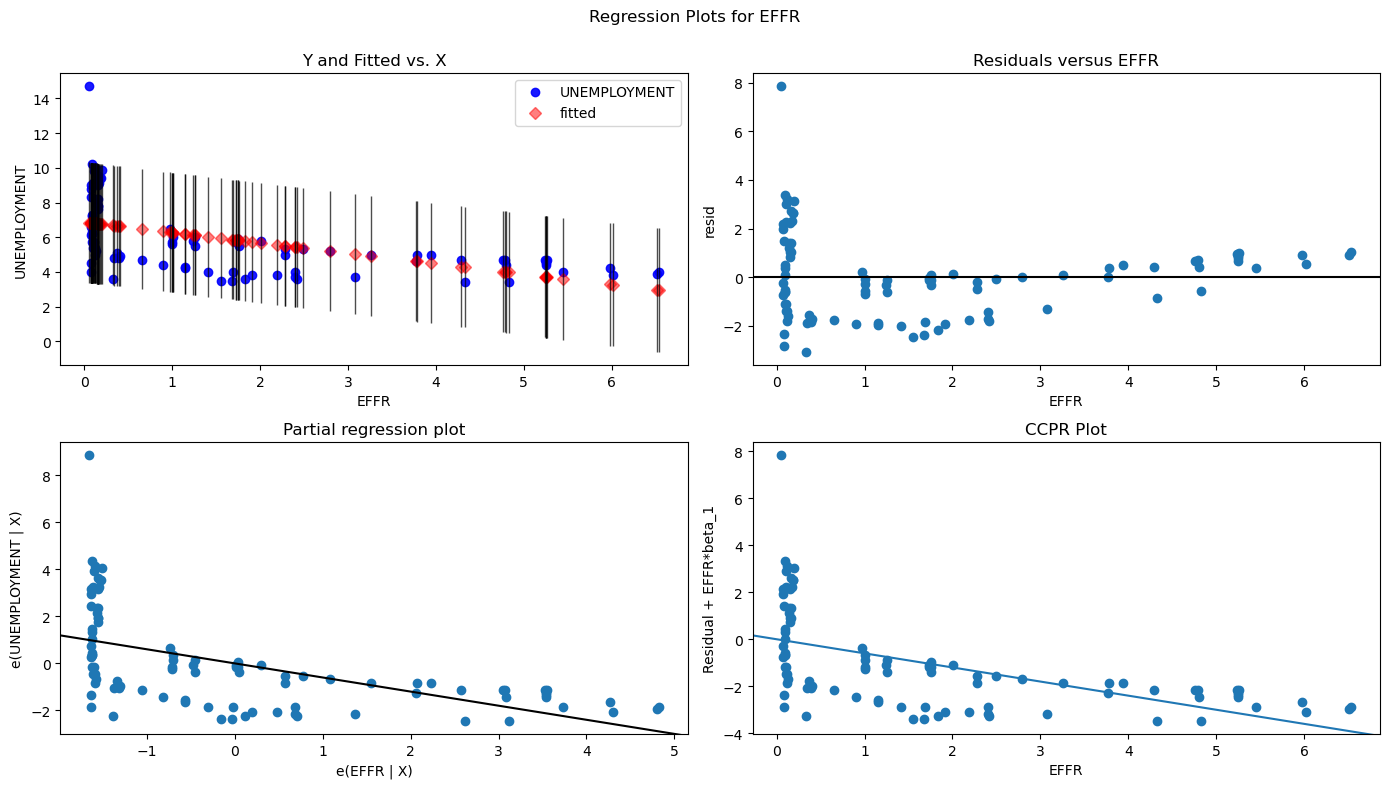

In [131]:
# fit simple linear regression model
mod = ols('UNEMPLOYMENT ~ EFFR',
                   data=merged).fit()
  
# display model summary
print(mod.summary())
  
# modify figure size
fig = plt.figure(figsize=(14, 8))
  
# creating regression plots
fig = sm.graphics.plot_regress_exog(mod,
                                    'EFFR',
                                    fig=fig)

In [245]:
output_notebook()
curdoc().theme = 'dark_minimal'

TOOLS = "pan,wheel_zoom,box_zoom,reset,save,box_select"

dates = np.array(merged['DATE'], dtype=np.datetime64)
range_mid_date = int(len(dates) / 2) + 1
range_end_date = dates[len(dates) - 1]

effr_color =  '#009E73'

pce_color = '#56B4E9'
pce_sma_color = 'beige'

unemp_color = '#E69F00'
unemp_sma_color = 'beige'

Loading BokehJS ...

In [246]:
effr_src = ColumnDataSource(data=dict(date=dates, rate=merged['EFFR']))

unemp_src = ColumnDataSource(data=dict(date=dates, rate=merged['UNEMPLOYMENT']))

unemp_src = unemp_no_lag_src

p = figure(title='EFFR, Unemployment Moving Avg', height=300, width=800, tools=TOOLS, #toolbar_location=None,
           x_axis_type="datetime", x_axis_location="above",
           x_range=(dates[0], range_end_date))

p.line('date', 'rate', source=effr_src, color=effr_color, legend_label='Effective Federal Funds Rate')
p.line('date', 'rate', source=unemp_src, color=unemp_color, legend_label='Unemployment Moving Average (1Y)')
p.yaxis.axis_label = 'Rate'

#p.line('date', 'rate', source=effr_chg_src, color='#3195ce', legend_label='EFFR % (1-month change)')
#p.line('date', 'rate', source=cpi_src, color='#E69F00', legend_label='Inflation (12-month % change)')
#p.line('date', 'rate', source=unemp_lag_src, color='#009E73', legend_label='Lagged Unemployment (12 Months)')
# p.line('date', 'rate', source=unemp_src, color='#009E73', legend_label='Unemployment')

# range_tool = RangeTool(x_range=p.x_range)
# range_tool.overlay.fill_color = "white"
# range_tool.overlay.fill_alpha = 0.3
# select = figure(title="Drag the middle and edges of the selection box to change the range above",
#                 height=130, width=800, y_range=p.y_range,
#                 x_axis_type="datetime", y_axis_type=None,
#                 toolbar_location=None)

# select.line('date', 'rate', source=effr_src, color='#56B4E9')
# select.line('date', 'rate', source=unemp_no_lag_src, color='#E69F00')
# #select.ygrid.grid_line_color = None
# select.add_tools(range_tool)
#show(Column(p, select))

show(Column(p))

In [248]:
effr_src = ColumnDataSource(data=dict(date=dates, rate=merged['EFFR']))
pce_src = ColumnDataSource(data=dict(date=dates, rate=merged['PCE_SMA_2Y']))

p = figure(title='EFFR, PCE Moving Avg', height=300, width=800, tools=TOOLS, #toolbar_location=None,
           x_axis_type="datetime", x_axis_location="above",
           x_range=(dates[0], range_end_date))

p.line('date', 'rate', source=effr_src, color=effr_color, legend_label='Effective Federal Funds Rate')
p.line('date', 'rate', source=pce_src, color=pce_color, legend_label='PCE Moving Average (2Y)')
p.hspan(y=[2.0],line_width=[1], line_color="red", line_dash='dashed')
p.yaxis.axis_label = 'Rate'

# range_tool = RangeTool(x_range=p.x_range)
# range_tool.overlay.fill_color = "white"
# range_tool.overlay.fill_alpha = 0.2

# select = figure(title="Drag the middle and edges of the selection box to change the range above",
#                 height=400, width=800, y_range=p.y_range,
#                 x_axis_type="datetime")

# select.line('date', 'rate', source=effr_src, color='#56B4E9')
# select.line('date', 'rate', source=pce_src, color='#E69F00')
# #select.ygrid.grid_line_color = None
# select.add_tools(range_tool)


show(Column(p))

In [249]:
# import numpy as np

# from bokeh.layouts import column
# from bokeh.models import ColumnDataSource, RangeTool, Span, BoxAnnotation, Label
# from bokeh.plotting import figure
# from bokeh.io import output_notebook, show

# output_notebook()

In [256]:
# The lowest level of unemployment that the economy can sustain changes over time as the jobs market changes

data_src = ColumnDataSource(data=dict(date=dates, rate=merged['PCE']))
data_src_sma = ColumnDataSource(data=dict(date=dates, rate=merged['PCE_SMA_2Y']))

p = figure(height=400, width=900, tools=TOOLS, #toolbar_location=None,
           x_axis_type="datetime", x_axis_location="above",
           x_range=(dates[0], range_end_date))

title = '''
Fed Monetary Policy has been effective in keeping inflation low (2% target) and stable over\nthe long term (Price Stability Mandate).
'''
p.title.text = title
p.title.align = "left"
p.title.text_font_size = "15px"
p.title.text_color = effr_color

#p.line('date', 'rate', source=effr_src, color='#E69F00', legend_label='Effective Federal Funds Rate')
p.line('date', 'rate', source=data_src, color=pce_color, legend_label='PCE')
p.line('date', 'rate', source=data_src_sma, color=pce_sma_color, legend_label='PCE Moving Average (2Y)', line_dash='dotted')
p.yaxis.axis_label = 'Rate'

#p.legend.align = 'left'
p.legend.label_text_font_size = '10px'
p.legend.location = 'top'

#p.grid.dimension = 1

#p.hspan(y=[merged['UNEMPLOYMENT'].mean()],line_width=[1], line_color="#E69F00", line_dash='dashed')
p.hspan(y=[2.0],line_width=[1], line_color="red", line_dash='dashed')

black_swan_events = [
#   ('9/11', pd.to_datetime('2001-09-11'), 15),
#     ('SARS', pd.to_datetime('2003-01-14'), 40),
    ('Global Financial Crisis', pd.to_datetime('2007-10-09'), 1022),
#     ('Libya Intervention', pd.to_datetime('2011-02-18'), 29),
#     ('Brexit', pd.to_datetime('2016-06-08'), 9),
    ('COVID-19', pd.to_datetime('2019-02-19'), 1500)
    ]
for bse in black_swan_events:
    box = BoxAnnotation(left=bse[1], right=bse[1] + timedelta(days=bse[2]), fill_alpha=0.2, fill_color='pink')
    label = Label(x=bse[1], y=0, x_units='data', y_units='screen', text=bse[0],
              border_line_color=None, text_font_size='10px',text_color='white',
              background_fill_color=None, background_fill_alpha=1.0)    
    p.add_layout(box)
    p.add_layout(label)
    
# range_tool = RangeTool(x_range=p.x_range)
# range_tool.overlay.fill_color = "white"
# range_tool.overlay.fill_alpha = 0.2

# select = figure(title="Drag the middle and edges of the selection box to change the range above",
#                 height=130, width=800, y_range=p.y_range,
#                 x_axis_type="datetime", y_axis_type=None)


# select.line('date', 'rate', source=unemp_src, color='#E69F00')
# select.ygrid.grid_line_color = None
# select.add_tools(range_tool)


show(Column(p))

In [258]:
data_src = ColumnDataSource(data=dict(date=dates, rate=merged['UNEMPLOYMENT']))
data_src_sma = ColumnDataSource(data=dict(date=dates, rate=merged['UNEMPLOYMENT_SMA_2Y']))

p = figure(height=400, width=900, tools=TOOLS, #toolbar_location=None,
           x_axis_type="datetime", x_axis_location="above",
           x_range=(dates[0], range_end_date))

title = '''
Fed Monetary Policy has been ineffective in fulfilling the Maximum Employment mandate. Policies outside the\n
control of the Fed can have a significant effect on the maximum sustainable level of employment (as of 2022: 4.3%).
'''
p.title.text = title
p.title.align = "left"
p.title.text_font_size = "15px"
p.title.text_color = unemp_color

#p.line('date', 'rate', source=effr_src, color='#E69F00', legend_label='Effective Federal Funds Rate')
p.line('date', 'rate', source=data_src, color=unemp_color, legend_label='Unemployment')
p.line('date', 'rate', source=data_src_sma, color=unemp_sma_color, legend_label='Unemployment Moving Average (2Y)', line_dash='dotted')
p.yaxis.axis_label = 'Rate'

#p.legend.align = 'left'
p.legend.label_text_font_size = '10px'
p.legend.location = 'top'

#p.grid.dimension = 1

#p.hspan(y=[merged['UNEMPLOYMENT'].mean()],line_width=[1], line_color="#E69F00", line_dash='dashed')
p.hspan(y=[4.3],line_width=[1], line_color="red", line_dash='dashed')

black_swan_events = [
#   ('9/11', pd.to_datetime('2001-09-11'), 15),
#     ('SARS', pd.to_datetime('2003-01-14'), 40),
    ('Global Financial Crisis', pd.to_datetime('2007-10-09'), 1022),
#     ('Libya Intervention', pd.to_datetime('2011-02-18'), 29),
#     ('Brexit', pd.to_datetime('2016-06-08'), 9),
    ('COVID-19', pd.to_datetime('2019-02-19'), 1500)
    ]
for bse in black_swan_events:
    box = BoxAnnotation(left=bse[1], right=bse[1] + timedelta(days=bse[2]), fill_alpha=0.2, fill_color='pink')
    label = Label(x=bse[1], y=0, x_units='data', y_units='screen', text=bse[0],
              border_line_color=None, text_font_size='10px',text_color='white',
              background_fill_color=None, background_fill_alpha=1.0)    
    p.add_layout(box)
    p.add_layout(label)
    
# range_tool = RangeTool(x_range=p.x_range)
# range_tool.overlay.fill_color = "white"
# range_tool.overlay.fill_alpha = 0.2

# select = figure(title="Drag the middle and edges of the selection box to change the range above",
#                 height=130, width=800, y_range=p.y_range,
#                 x_axis_type="datetime", y_axis_type=None)


# select.line('date', 'rate', source=unemp_src, color='#E69F00')
# select.ygrid.grid_line_color = None
# select.add_tools(range_tool)


show(Column(p))